# Image Captioning using Deep Learning: Assignment-2

*  In this assignment, we will build a classifier for MNIST from using [PyTorch](https://pytorch.org/docs/stable/index.html). 

*   No limitations on your model this time, just don't use CNNs now, that's up next week.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Also remember to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch.

In [16]:
!pip install scikit-learn 

In [21]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 1.4 MB/s eta 0:00:00
     ------------------------------------ 163.6/163.6 kB 755.5 kB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00


## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [1]:
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


# Your Code from here...

In [2]:
# load the data set
from torch.utils.data import DataLoader
import numpy as np
import torch
import sklearn as sklearn
import matplotlib.pyplot as plt




# normalize the dataset, won't be doing it here in later assignments
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#  Split into X_train, y_train, X_test, y_test
#  you can use stratified splitting from sklearn library
from torch.utils.data import random_split
train_ds, val_ds = random_split(train,[59500,500])

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)





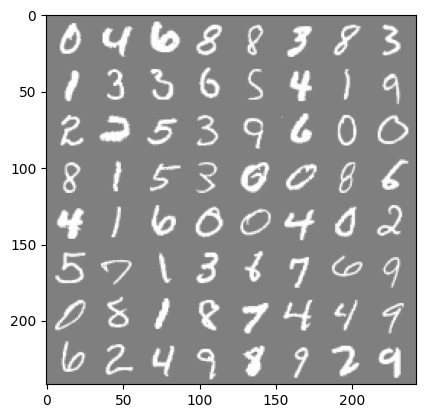

0 4 6 8 8 3 8 3 1 3 3 6 5 4 1 9


In [3]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
batch_size=16



def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(batch_size)))



In [4]:
# define your dataset for pre-processing into Neural Network






## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [```nn.ReLU```](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- [```nn.BatchNorm1d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)


In [5]:
# define a child class of nn.Module for your model
# specify the architecture here itself

import torch.nn as nn
import torch.nn.functional as F


class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Conv2d(1,32,(3,3)),
            nn.ReLU(),
            nn.Conv2d(32,64,(3,3)),
            nn.ReLU(),
            nn.Conv2d(64,64,(3,3)),
            nn.ReLU(),
            
            nn.Flatten(),
            nn.Linear(64*(28-6)*(28-6),10)
        )
       

    def forward(self, x):
        return self.model(x)
       


clf =ImageClassifier()




## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [6]:
import torch.optim as optim


def train(model, optimizer, criterion, train_loader, display_step=None):
    for epoch in range(3):
        
        for data in train_loader:
            xdt,ydt=data
            yhat=model(xdt)
            loss=criterion(yhat,ydt)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    print(f"Epoch{epoch} loss is{loss.item()}")
            


       

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [7]:
def predict(model, X_test):
    x_tensor=torch.from_numpy(X_test)
    outputs = model(x_tensor)
    value,pred = torch.max(outputs, 1)
    pred=pred.data
    return pred.numpy()

# print('Predicted: ', ' '.join(f'{predicted[j]}'
#                               for j in range(4)))

In [8]:

def accuracy(pred, labels):
    total=0
    correct=0
    
    
    
    total += labels.size(0)
    correct += torch.sum(pred == labels)

    return 100 * correct // total

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [9]:
# def create_lenet():
#     model = nn.Sequential(
#         nn.Conv2d(1, 6, 5, padding=2),
#         nn.ReLU(),
#         nn.AvgPool2d(2, stride=2),
#         nn.Conv2d(6, 16, 5, padding=0),
#         nn.ReLU(),
#         nn.AvgPool2d(2, stride=2),
#         nn.Flatten(),
#         nn.Linear(400, 120),
#         nn.ReLU(),
#         nn.Linear(120, 84),
#         nn.ReLU(),
#         nn.Linear(84, 10)
#     )
#     return model


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr=0.001, momentum=0.9)



train(clf, optimizer, criterion, train_loader, display_step=None)

Epoch2 loss is0.15453119575977325


## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [10]:
for data in val_loader:
    x,label=data
    a=predict(clf,x.numpy())
    #print(accuracy(torch.from_numpy(a),label))
    print(a)

[7 2 8 8 1 4 5 2 0 6 1 5 2 6 8 0 2 9 6 3 3 1 2 2 2 7 7 0 6 5 1 8 4 2 2 0 2
 9 3 2 2 1 3 8 7 3 7 2 2 0 6 0 8 9 3 9 9 5 1 1 6 1 1 8]
[1 7 6 6 7 3 6 6 5 6 8 9 2 1 5 7 9 9 4 9 7 9 2 6 1 1 2 7 1 5 3 3 9 7 7 2 9
 7 8 7 1 2 7 7 4 6 0 8 3 3 2 9 7 6 7 0 9 7 7 4 0 2 1 2]
[0 7 9 6 3 8 6 7 4 8 3 0 6 1 5 6 5 8 2 4 6 9 2 7 3 9 2 1 9 5 7 1 5 8 4 8 0
 0 5 8 2 5 4 4 0 1 7 7 8 6 1 4 7 1 8 0 8 2 2 3 7 8 3 8]
[6 0 7 3 2 4 5 1 8 9 9 3 0 6 0 5 3 1 4 5 3 9 1 4 8 5 2 8 6 2 3 2 9 8 1 6 3
 7 2 4 1 7 5 1 8 8 2 7 0 4 6 0 8 5 9 0 6 2 2 3 5 7 4 3]
[8 6 7 3 6 0 4 6 9 7 0 0 5 3 8 7 1 2 3 1 4 3 1 5 6 5 8 9 3 4 6 0 8 2 7 6 2
 7 0 2 3 7 3 9 5 7 2 7 8 6 5 2 9 0 2 4 8 8 9 0 3 8 7 9]
[4 7 4 0 7 5 1 0 8 5 2 6 9 7 5 7 5 4 5 8 8 5 6 8 8 1 7 7 1 9 7 6 0 3 6 2 2
 9 2 2 0 9 6 2 3 2 3 0 7 1 4 7 5 0 1 5 1 5 0 5 6 2 9 1]
[4 5 6 8 4 2 7 5 0 0 9 1 2 2 3 6 4 2 5 0 3 7 5 9 1 5 0 8 4 8 5 2 5 2 3 7 3
 9 0 8 3 6 3 8 7 6 4 7 9 8 6 6 3 2 2 4 8 1 8 7 8 5 0 1]
[2 8 5 8 1 6 6 8 1 9 7 1 0 9 8 4 6 3 2 9 4 7 4 2 0 1 9 5 8 5 5 3 1 9 0 3 8
 3 4 9 0

In [11]:
for data in val_loader:
    x,label=data
    print(label)


tensor([7, 2, 8, 8, 1, 4, 5, 2, 0, 6, 1, 5, 2, 6, 8, 0, 2, 9, 6, 3, 3, 1, 2, 2,
        2, 7, 7, 0, 6, 3, 1, 8, 4, 2, 2, 0, 2, 9, 3, 2, 2, 1, 3, 8, 7, 3, 7, 2,
        2, 0, 6, 0, 3, 7, 3, 9, 9, 5, 1, 1, 6, 1, 1, 8])
tensor([1, 7, 6, 6, 7, 3, 6, 6, 5, 6, 8, 9, 2, 1, 5, 7, 9, 9, 4, 9, 7, 9, 2, 6,
        1, 1, 0, 7, 1, 5, 3, 3, 9, 7, 7, 2, 9, 7, 8, 7, 1, 2, 7, 7, 4, 6, 0, 8,
        3, 3, 2, 9, 7, 6, 7, 0, 9, 7, 7, 4, 0, 2, 1, 3])
tensor([0, 7, 9, 6, 3, 8, 6, 7, 4, 8, 3, 0, 6, 1, 5, 6, 5, 8, 2, 4, 6, 9, 2, 7,
        3, 9, 2, 1, 9, 5, 7, 1, 5, 8, 4, 8, 0, 0, 5, 8, 2, 5, 4, 4, 0, 1, 7, 7,
        8, 6, 1, 4, 7, 4, 8, 0, 8, 3, 2, 8, 7, 8, 3, 1])
tensor([4, 0, 7, 3, 2, 4, 5, 1, 8, 9, 9, 3, 0, 6, 0, 5, 3, 1, 4, 5, 3, 9, 1, 4,
        8, 5, 2, 8, 6, 2, 3, 2, 9, 1, 1, 6, 3, 7, 2, 4, 1, 7, 5, 1, 8, 8, 2, 7,
        0, 4, 6, 0, 8, 5, 9, 0, 6, 2, 2, 3, 5, 7, 4, 3])
tensor([8, 6, 7, 3, 6, 0, 4, 6, 9, 7, 0, 0, 5, 3, 8, 7, 1, 2, 3, 1, 4, 3, 1, 5,
        6, 5, 8, 9, 3, 4, 6, 0, 8, 2, 7, 6, 2, 7, 0,

## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_2.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_2.pt``` model-weights file to the repository.

In [19]:

# from google.colab import files

# torch.save(final_model, 'ass_2.pt')
# files.download('ass_2.pt') # download the file from the Colab session for submission
import torch
import torchvision.models as models
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

C:\Users\Jhanvi\.conda\envs\pytorch1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Jhanvi\.conda\envs\pytorch1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Jhanvi/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


Check if it got saved right!

In [20]:

model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
torch.save(model, 'model.pth')

In [22]:
model = torch.load('model.pth')